#                                                         IoT Network Intrusion Dataset

a machine learning model to detect network intrusions in IoT devices. This model will be trained on a dataset containing various features related to network traffic and device behavior. The goal is to accurately classify whether a given network activity is benign or malicious.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, confusion_matrix, classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import joblib 


In [2]:
# loading the dataset
data=pd.read_csv('src/IoT Network Intrusion Dataset.csv')

In [3]:
# checking the first 5 rows of the dataset
data.head()

Flow_ID           Src_IP  Src_Port  \
0   192.168.0.13-192.168.0.16-10000-10101-17     192.168.0.13     10000   
1    192.168.0.13-222.160.179.132-554-2179-6  222.160.179.132      2179   
2     192.168.0.13-192.168.0.16-9020-52727-6     192.168.0.16     52727   
3     192.168.0.13-192.168.0.16-9020-52964-6     192.168.0.16     52964   
4  192.168.0.1-239.255.255.250-36763-1900-17      192.168.0.1     36763   

            Dst_IP  Dst_Port  Protocol               Timestamp  Flow_Duration  \
0     192.168.0.16     10101        17  25/07/2019 03:25:53 AM             75   
1     192.168.0.13       554         6  26/05/2019 10:11:06 PM           5310   
2     192.168.0.13      9020         6          11/7/2019 1:24            141   
3     192.168.0.13      9020         6           4/9/2019 3:58            151   
4  239.255.255.250      1900        17          10/9/2019 1:41            153   

   Tot_Fwd_Pkts  Tot_Bwd_Pkts  ...  Active_Std  Active_Max  Active_Min  \
0             1             1  ...         0.0           0           0   
1             1             2  ...         0.0           0           0   
2             0             3  ...         0.0           0           0   
3             0             2  ...         0.0           0           0   
4             2             1  ...         0.0           0           0   

   Idle_Mean     Idle_Std  Idle_Max  Idle_Min    Label    Cat  \
0       75.0     0.000000        75        75  Anomaly  Mirai   
1     2655.0  2261.327486      4254      1056  Anomaly    DoS   
2       70.5     0.707107        71        70  Anomaly   Scan   
3      151.0     0.000000       151       151  Anomaly  Mirai   
4       76.5     0.707107        77        76  Anomaly  Mirai   

                 Sub_Cat  
0      Mirai-Ackflooding  
1        DoS-Synflooding  
2           Scan Port OS  
3  Mirai-Hostbruteforceg  
4  Mirai-Hostbruteforceg  

[5 rows x 86 columns]

In [4]:
# checking the last 5 rows of the dataset
data.tail()

Flow_ID           Src_IP  Src_Port  \
625778  192.168.0.24-210.89.164.90-56112-8043-17     192.168.0.24     56112   
625779   192.168.0.13-222.131.171.244-554-4570-6  222.131.171.244      4570   
625780    192.168.0.13-192.168.0.16-9020-52739-6     192.168.0.16     52739   
625781    192.168.0.13-192.168.0.16-9020-49784-6     192.168.0.13      9020   
625782  192.168.0.13-192.168.0.16-10000-10101-17     192.168.0.13     10000   

               Dst_IP  Dst_Port  Protocol               Timestamp  \
625778  210.89.164.90      8043        17  25/07/2019 03:25:00 AM   
625779   192.168.0.13       554         6  26/05/2019 10:06:51 PM   
625780   192.168.0.13      9020         6          11/7/2019 1:29   
625781   192.168.0.16     49784         6  20/05/2019 05:00:29 AM   
625782   192.168.0.16     10101        17  25/07/2019 03:25:10 AM   

        Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  ...  Active_Std  \
625778            277             1             1  ...         0.0   
625779           1658             0             2  ...         0.0   
625780             77             1             1  ...         0.0   
625781            240             2             1  ...         0.0   
625782            198             2             1  ...         0.0   

        Active_Max  Active_Min  Idle_Mean   Idle_Std  Idle_Max  Idle_Min  \
625778           0           0      277.0   0.000000       277       277   
625779           0           0     1658.0   0.000000      1658      1658   
625780           0           0       77.0   0.000000        77        77   
625781           0           0      120.0   7.071068       125       115   
625782           0           0       99.0  32.526912       122        76   

          Label     Cat             Sub_Cat  
625778  Anomaly   Mirai  Mirai-UDP Flooding  
625779  Anomaly     DoS     DoS-Synflooding  
625780  Anomaly    Scan        Scan Port OS  
625781   Normal  Normal              Normal  
625782  Anomaly   Mirai  Mirai-UDP Flooding  

[5 rows x 86 columns]

In [5]:
# checking the shape of the dataset
data.shape

(625783, 86)

In [6]:
# checking the columns of the dataset
data.columns

Index(['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol',
       'Timestamp', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_

In [7]:
# checking the information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            625783 non-null  object 
 1   Src_IP             625783 non-null  object 
 2   Src_Port           625783 non-null  int64  
 3   Dst_IP             625783 non-null  object 
 4   Dst_Port           625783 non-null  int64  
 5   Protocol           625783 non-null  int64  
 6   Timestamp          625783 non-null  object 
 7   Flow_Duration      625783 non-null  int64  
 8   Tot_Fwd_Pkts       625783 non-null  int64  
 9   Tot_Bwd_Pkts       625783 non-null  int64  
 10  TotLen_Fwd_Pkts    625783 non-null  int64  
 11  TotLen_Bwd_Pkts    625783 non-null  int64  
 12  Fwd_Pkt_Len_Max    625783 non-null  int64  
 13  Fwd_Pkt_Len_Min    625783 non-null  int64  
 14  Fwd_Pkt_Len_Mean   625783 non-null  float64
 15  Fwd_Pkt_Len_Std    625783 non-null  float64
 16  Bw

In [8]:
# checking the summary of the dataset
data.describe()

Src_Port       Dst_Port       Protocol  Flow_Duration  \
count  625783.000000  625783.000000  625783.000000  625783.000000   
mean    35026.156190   16387.027479       9.971436     635.422865   
std     24721.047752   17550.363037       5.379857    3496.740723   
min         0.000000       0.000000       0.000000       0.000000   
25%      9020.000000    8899.000000       6.000000      76.000000   
50%     51991.000000    9020.000000       6.000000     132.000000   
75%     56361.000000   10101.000000      17.000000     221.000000   
max     65500.000000   65371.000000      17.000000   99984.000000   

        Tot_Fwd_Pkts  Tot_Bwd_Pkts  TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  \
count  625783.000000  625783.00000    625783.000000    625783.000000   
mean        1.675566       1.46853       570.738980       929.280973   
std         4.309970       1.21949      1161.873195      1731.760875   
min         0.000000       1.00000         0.000000         0.000000   
25%         0.000000       1.00000         0.000000        18.000000   
50%         1.000000       1.00000        32.000000       104.000000   
75%         2.000000       2.00000      1388.000000      1441.000000   
max       186.000000     560.00000    109846.000000    773284.000000   

       Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  ...  Fwd_Act_Data_Pkts  \
count    625783.000000    625783.000000  ...      625783.000000   
mean        392.489726       348.126571  ...           1.509913   
std         619.575865       588.161845  ...           4.332737   
min           0.000000         0.000000  ...           0.000000   
25%           0.000000         0.000000  ...           0.000000   
50%          30.000000        30.000000  ...           1.000000   
75%        1388.000000       386.000000  ...           1.000000   
max        1464.000000      1464.000000  ...         186.000000   

       Fwd_Seg_Size_Min    Active_Mean     Active_Std     Active_Max  \
count          625783.0  625783.000000  625783.000000  625783.000000   
mean                0.0       3.764405       0.353385       4.248735   
std                 0.0      68.064508      20.723370      88.934148   
min                 0.0       0.000000       0.000000       0.000000   
25%                 0.0       0.000000       0.000000       0.000000   
50%                 0.0       0.000000       0.000000       0.000000   
75%                 0.0       0.000000       0.000000       0.000000   
max                 0.0    9044.625000    8598.658250   26785.000000   

          Active_Min      Idle_Mean       Idle_Std       Idle_Max  \
count  625783.000000  625783.000000  625783.000000  625783.000000   
mean        3.462159     502.503832      52.403995     561.540512   
std        64.111043    2112.957360    1153.184897    2866.497606   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000      73.000000       0.000000      74.000000   
50%         0.000000      93.500000       0.000000     114.000000   
75%         0.000000     141.000000       1.527525     154.000000   
max      6659.000000   99973.000000   67071.906620   99973.000000   

            Idle_Min  
count  625783.000000  
mean      467.264459  
std      1931.909971  
min         0.000000  
25%        71.000000  
50%        78.000000  
75%       130.000000  
max     99973.000000  

[8 rows x 79 columns]

In [9]:
# checking the missing values in the dataset
data.isnull().sum()

Flow_ID     0
Src_IP      0
Src_Port    0
Dst_IP      0
Dst_Port    0
           ..
Idle_Max    0
Idle_Min    0
Label       0
Cat         0
Sub_Cat     0
Length: 86, dtype: int64

In [10]:
# checking the duplicate values in the dataset
data.duplicated().sum()

222618

In [11]:
# dropping the duplicate values
data.drop_duplicates(inplace=True)


In [12]:
# checking the duplicate values in the dataset after dropping the duplicate values
data.duplicated().sum()

0

In [13]:
# checking the unique values in the dataset
data.nunique().sum()

499308

In [14]:
data=data.drop(columns=[
    'Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp', 
    'Fwd_URG_Flags', 'Bwd_URG_Flags', 'CWE_Flag_Count', 'ECE_Flag_Cnt',
    'Subflow_Fwd_Pkts', 'Subflow_Fwd_Byts', 'Subflow_Bwd_Pkts', 'Subflow_Bwd_Byts',
    'Fwd_Pkts/b_Avg', 'Bwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg', 'Bwd_Blk_Rate_Avg',
    'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
    'Active_Mean', 'Active_Std', 'Active_Max', 'Active_Min',
    'Idle_Mean', 'Idle_Std', 'Idle_Max', 'Idle_Min'
]
)

In [15]:
coloumns=data.columns

for col in coloumns:
  print (col)

Src_Port
Dst_Port
Protocol
Flow_Duration
Tot_Fwd_Pkts
Tot_Bwd_Pkts
TotLen_Fwd_Pkts
TotLen_Bwd_Pkts
Bwd_Pkt_Len_Max
Bwd_Pkt_Len_Min
Bwd_Pkt_Len_Mean
Bwd_Pkt_Len_Std
Flow_Byts/s
Flow_Pkts/s
Flow_IAT_Mean
Flow_IAT_Std
Flow_IAT_Max
Flow_IAT_Min
Fwd_IAT_Tot
Fwd_IAT_Mean
Fwd_IAT_Std
Fwd_IAT_Max
Fwd_IAT_Min
Bwd_IAT_Tot
Bwd_IAT_Mean
Bwd_IAT_Std
Bwd_IAT_Max
Bwd_IAT_Min
Fwd_PSH_Flags
Bwd_PSH_Flags
Fwd_Header_Len
Bwd_Header_Len
Fwd_Pkts/s
Bwd_Pkts/s
Pkt_Len_Min
Pkt_Len_Max
Pkt_Len_Mean
Pkt_Len_Std
Pkt_Len_Var
FIN_Flag_Cnt
SYN_Flag_Cnt
RST_Flag_Cnt
PSH_Flag_Cnt
ACK_Flag_Cnt
URG_Flag_Cnt
Down/Up_Ratio
Pkt_Size_Avg
Fwd_Seg_Size_Avg
Bwd_Seg_Size_Avg
Fwd_Byts/b_Avg
Bwd_Byts/b_Avg
Init_Fwd_Win_Byts
Init_Bwd_Win_Byts
Fwd_Act_Data_Pkts
Fwd_Seg_Size_Min
Label
Cat
Sub_Cat


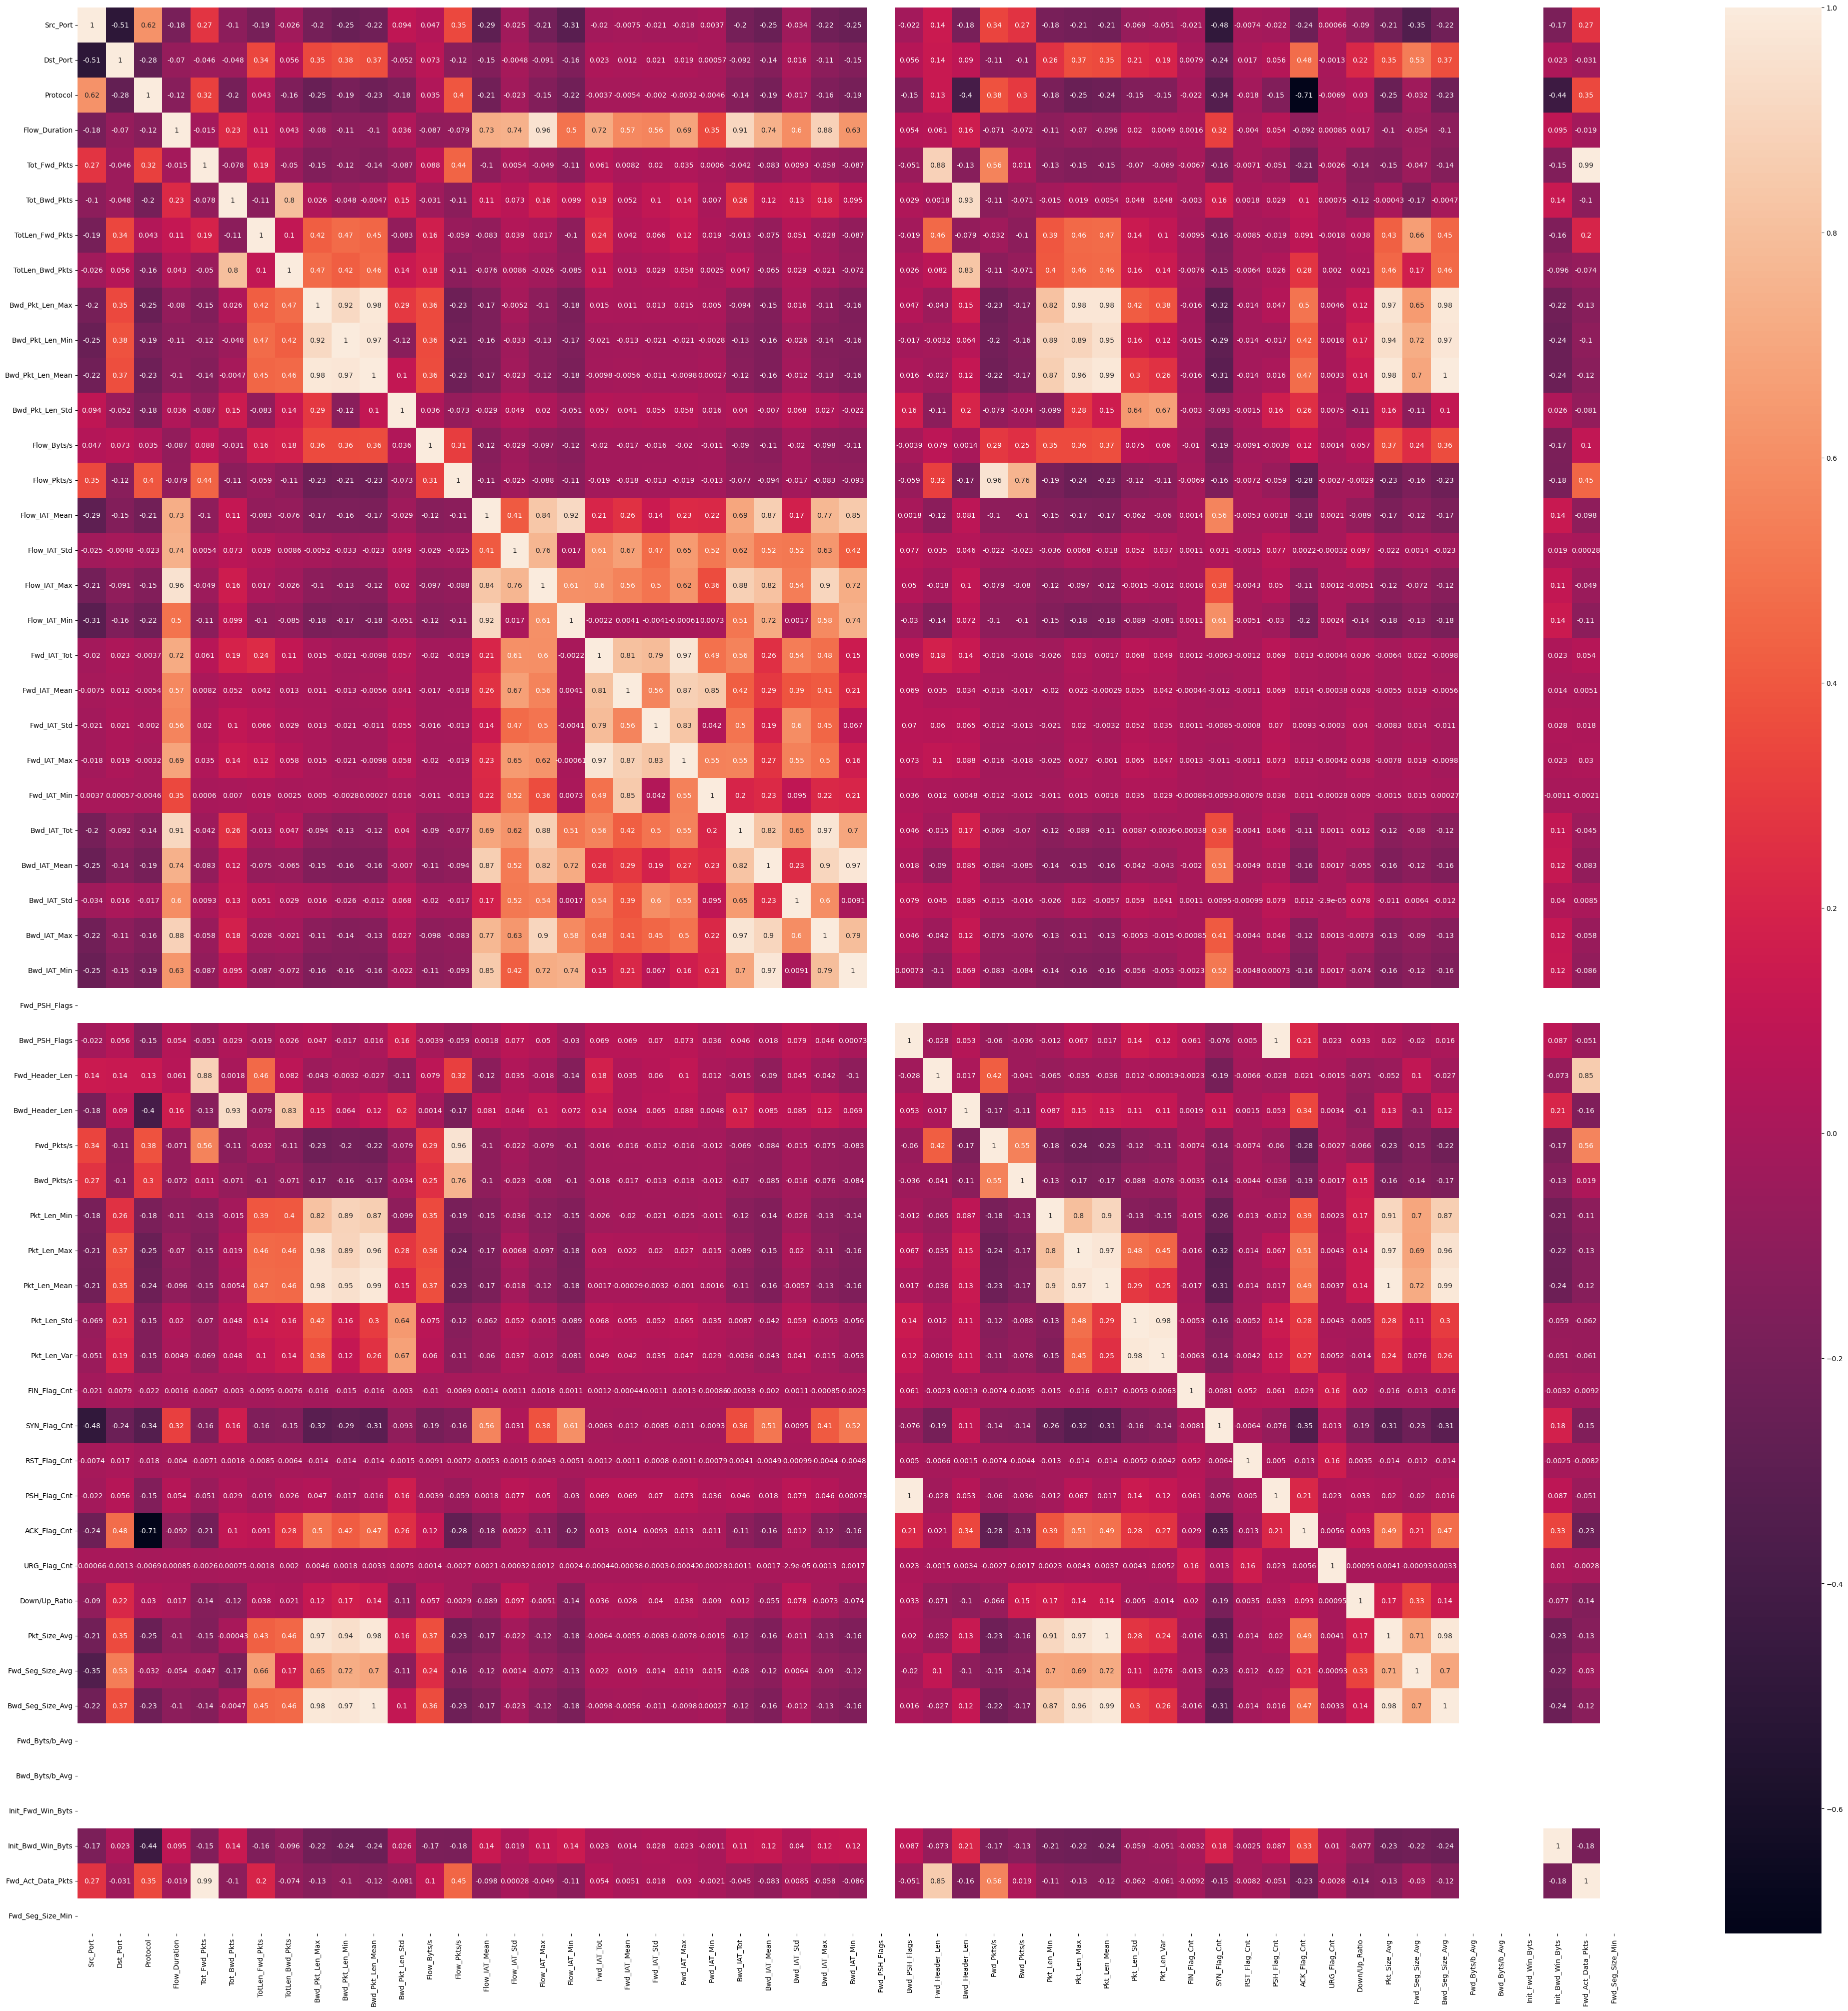

In [16]:


corr=data.drop(columns=['Label','Cat','Sub_Cat']).corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr,annot=True)

plt.show()

In [17]:
constant_columns = data.columns[data.nunique() == 1]
print("Constant Columns:", constant_columns.tolist())

Constant Columns: ['Fwd_PSH_Flags', 'Fwd_Byts/b_Avg', 'Bwd_Byts/b_Avg', 'Init_Fwd_Win_Byts', 'Fwd_Seg_Size_Min']


In [18]:
data=data.drop(columns=['Fwd_PSH_Flags', 'Fwd_Byts/b_Avg', 'Bwd_Byts/b_Avg', 'Init_Fwd_Win_Byts', 'Fwd_Seg_Size_Min'])

In [19]:
constant_columns = data.columns[data.nunique() == 1]
print("Constant Columns:", constant_columns.tolist())

Constant Columns: []


<Axes: >

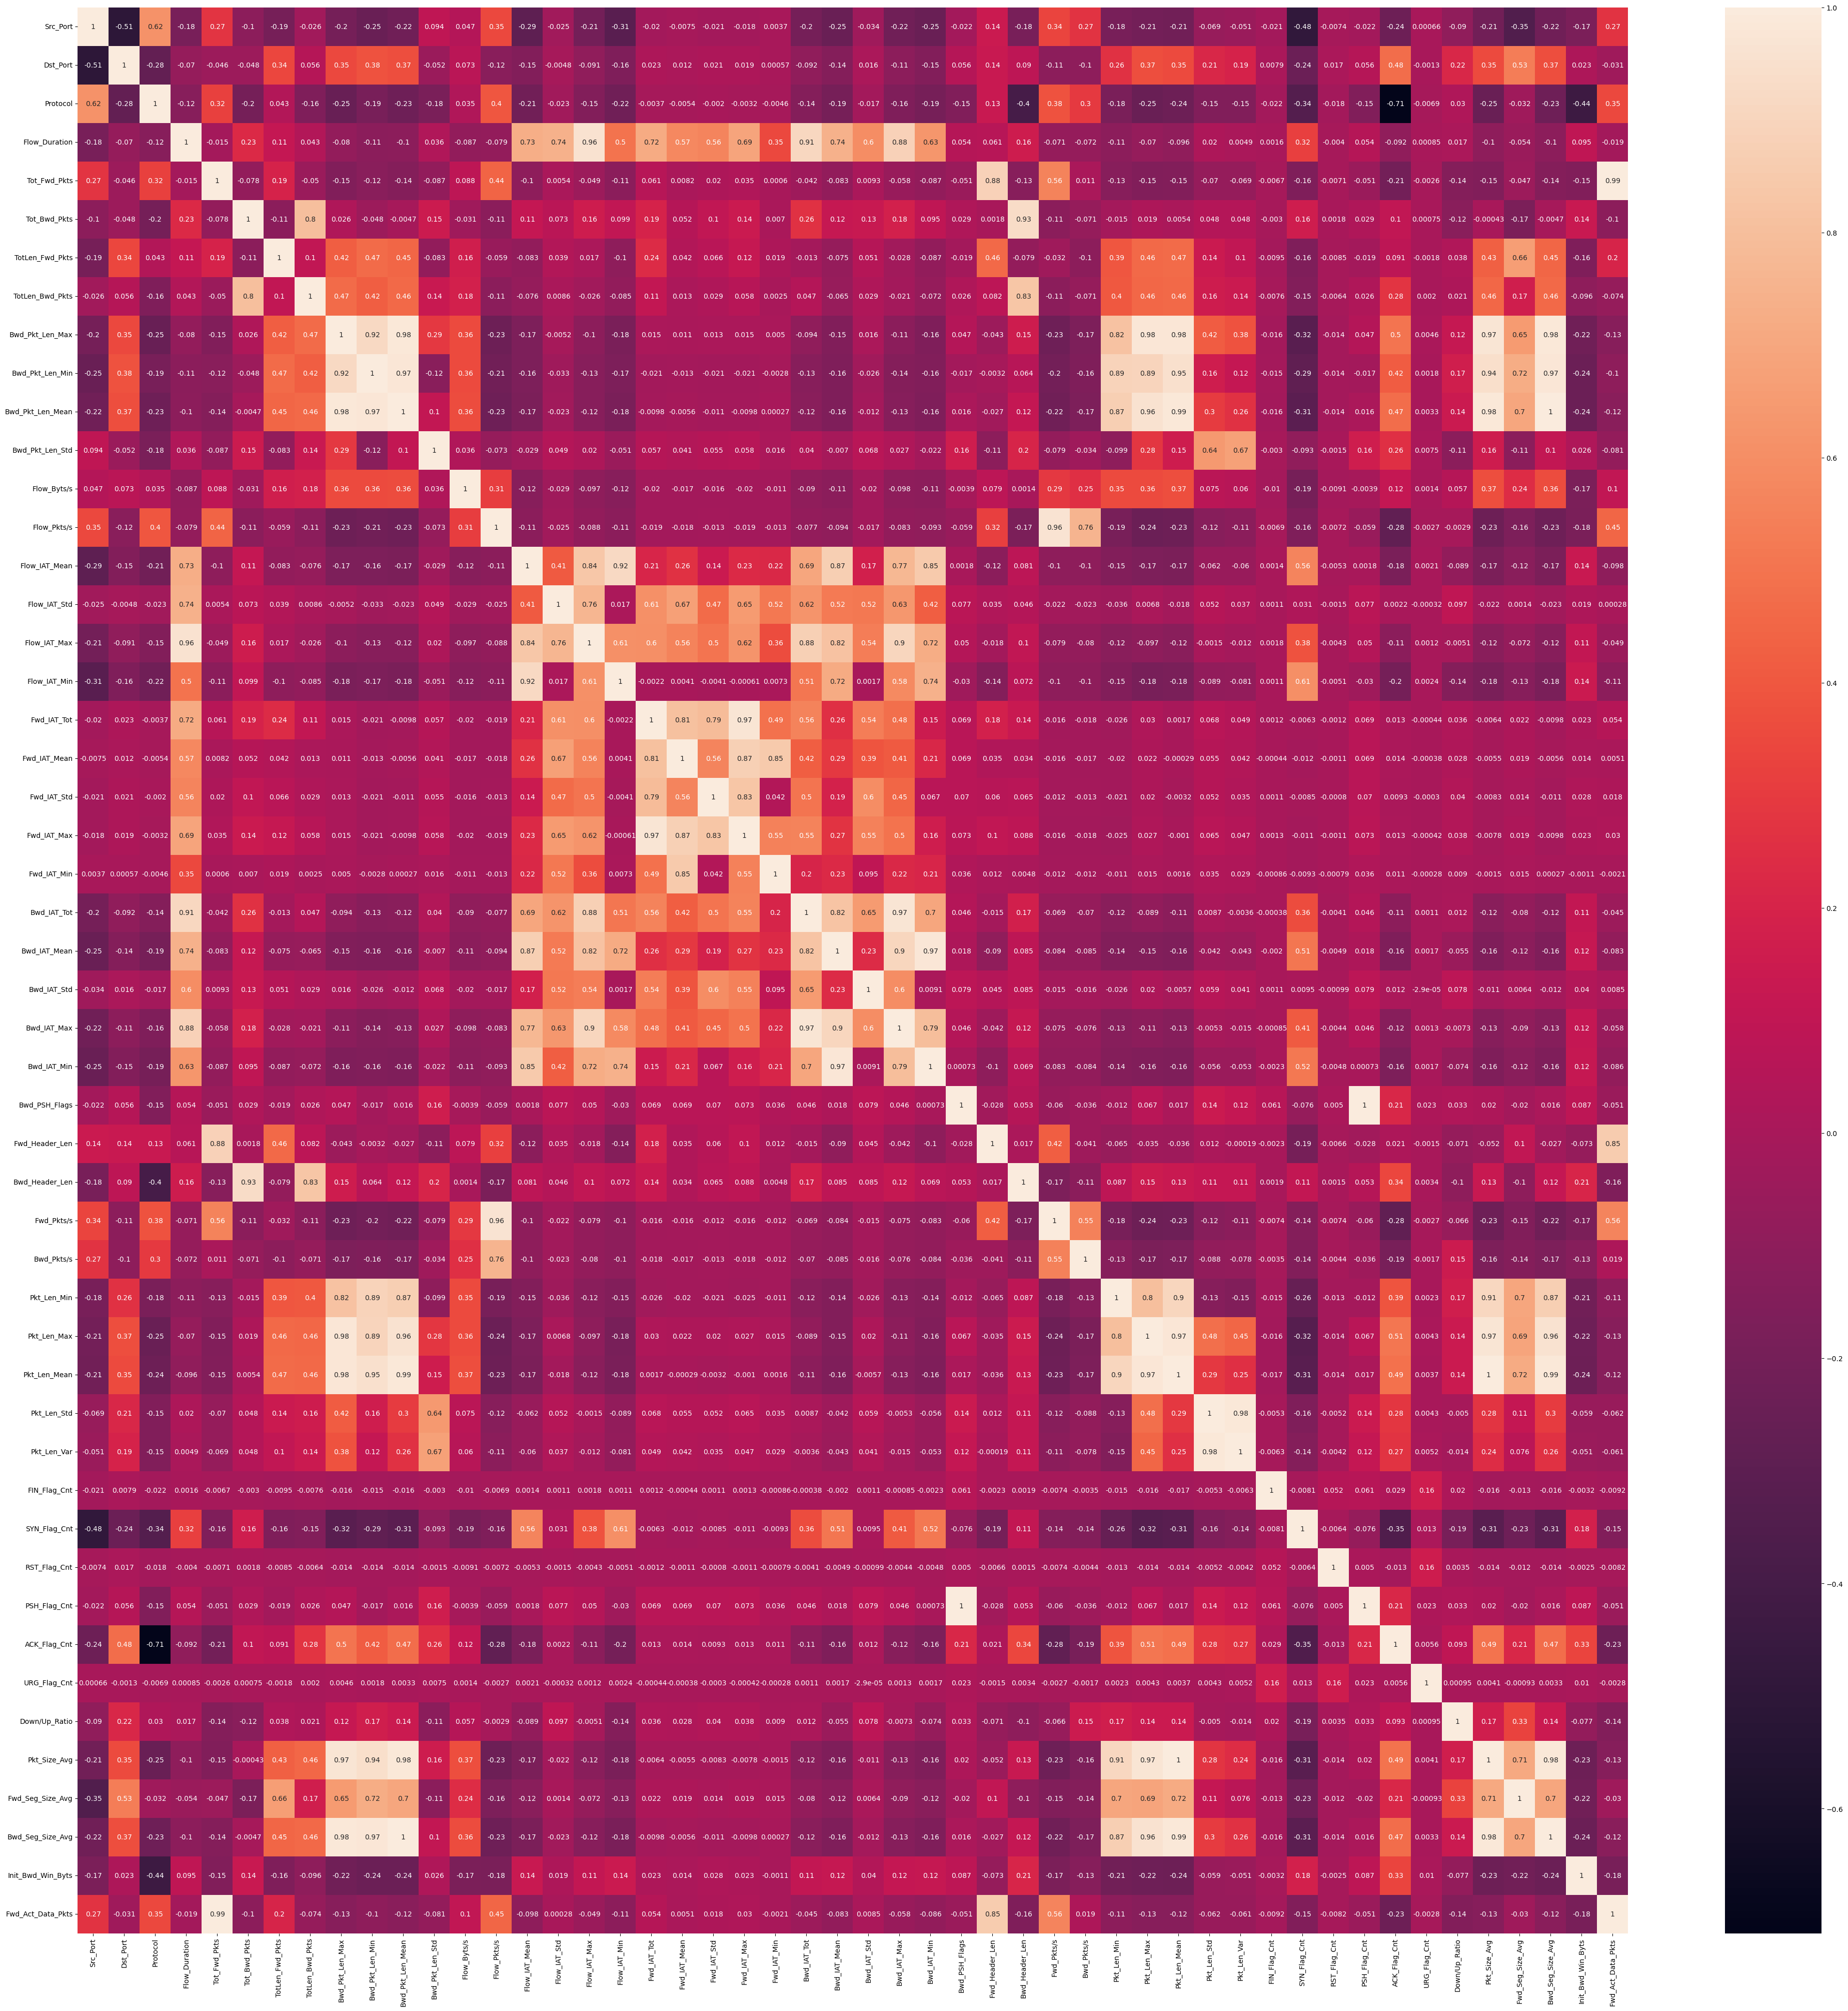

In [20]:

corr=data.drop(columns=['Label','Cat','Sub_Cat']).corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr,annot=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403165 entries, 0 to 625781
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Src_Port           403165 non-null  int64  
 1   Dst_Port           403165 non-null  int64  
 2   Protocol           403165 non-null  int64  
 3   Flow_Duration      403165 non-null  int64  
 4   Tot_Fwd_Pkts       403165 non-null  int64  
 5   Tot_Bwd_Pkts       403165 non-null  int64  
 6   TotLen_Fwd_Pkts    403165 non-null  int64  
 7   TotLen_Bwd_Pkts    403165 non-null  int64  
 8   Bwd_Pkt_Len_Max    403165 non-null  int64  
 9   Bwd_Pkt_Len_Min    403165 non-null  int64  
 10  Bwd_Pkt_Len_Mean   403165 non-null  float64
 11  Bwd_Pkt_Len_Std    403165 non-null  float64
 12  Flow_Byts/s        403165 non-null  float64
 13  Flow_Pkts/s        403165 non-null  float64
 14  Flow_IAT_Mean      403165 non-null  float64
 15  Flow_IAT_Std       403165 non-null  float64
 16  Flow_IA

In [22]:
label_encoder = LabelEncoder()
data['Label_Encoded'] = label_encoder.fit_transform(data['Label'])
data['Cat_Encoded']=label_encoder.fit_transform(data['Cat'])
data['Sub_Cat_Encoded']=label_encoder.fit_transform(data['Sub_Cat'])

In [23]:
data.nunique()

Src_Port             11205
Dst_Port              1034
Protocol                 3
Flow_Duration        12670
Tot_Fwd_Pkts           116
Tot_Bwd_Pkts            42
TotLen_Fwd_Pkts       2479
TotLen_Bwd_Pkts       2612
Bwd_Pkt_Len_Max       1114
Bwd_Pkt_Len_Min       1191
Bwd_Pkt_Len_Mean      2583
Bwd_Pkt_Len_Std       2219
Flow_Byts/s          31311
Flow_Pkts/s          19578
Flow_IAT_Mean        19053
Flow_IAT_Std         28879
Flow_IAT_Max         12399
Flow_IAT_Min         11041
Fwd_IAT_Tot           1922
Fwd_IAT_Mean          6221
Fwd_IAT_Std          16998
Fwd_IAT_Max           1793
Fwd_IAT_Min           1196
Bwd_IAT_Tot          12341
Bwd_IAT_Mean         13466
Bwd_IAT_Std           4560
Bwd_IAT_Max          12223
Bwd_IAT_Min          11529
Bwd_PSH_Flags            2
Fwd_Header_Len         162
Bwd_Header_Len          86
Fwd_Pkts/s            9360
Bwd_Pkts/s           14067
Pkt_Len_Min           1240
Pkt_Len_Max           1122
Pkt_Len_Mean          5176
Pkt_Len_Std           4673
P

In [24]:
# Replace infinite values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
data.dropna(inplace=True)

best_features = feature_selection.SelectKBest(score_func=feature_selection.f_classif, k=15)
best_features.fit(data.drop(columns=['Label', 'Cat', 'Sub_Cat','Label_Encoded', 'Cat_Encoded',
       'Sub_Cat_Encoded']), data['Label'])
top_features = data.drop(columns=['Label', 'Cat', 'Sub_Cat','Label_Encoded', 'Cat_Encoded',
       'Sub_Cat_Encoded']).columns[best_features.get_support()]
print(top_features)

Index(['Src_Port', 'Dst_Port', 'Protocol', 'TotLen_Fwd_Pkts',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean', 'Pkt_Len_Max',
       'Pkt_Len_Mean', 'Pkt_Len_Std', 'Pkt_Len_Var', 'ACK_Flag_Cnt',
       'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg', 'Init_Bwd_Win_Byts'],
      dtype='object')


In [25]:
data_selected=data[['Src_Port', 'Dst_Port', 'Protocol', 'TotLen_Fwd_Pkts',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean', 'Pkt_Len_Max',
       'Pkt_Len_Mean', 'Pkt_Len_Std', 'Pkt_Len_Var', 'ACK_Flag_Cnt',
       'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg', 'Init_Bwd_Win_Byts','Label', 'Cat', 'Sub_Cat','Label_Encoded', 'Cat_Encoded',
       'Sub_Cat_Encoded']]

In [26]:
data_selected.describe()

Src_Port       Dst_Port       Protocol  TotLen_Fwd_Pkts  \
count  402842.000000  402842.000000  402842.000000    402842.000000   
mean    34756.629934   15280.902654      10.509021       509.914157   
std     25199.791167   17053.620058       5.508529      1228.746352   
min         0.000000       0.000000       0.000000         0.000000   
25%      8449.000000    8011.000000       6.000000         0.000000   
50%     51114.000000    9020.000000       6.000000        32.000000   
75%     56361.000000   10101.000000      17.000000       480.000000   
max     65500.000000   65371.000000      17.000000    109846.000000   

       Bwd_Pkt_Len_Max  Bwd_Pkt_Len_Min  Bwd_Pkt_Len_Mean    Pkt_Len_Max  \
count    402842.000000    402842.000000     402842.000000  402842.000000   
mean        510.355109       448.652099        481.559238     529.880067   
std         662.748775       638.409625        638.381851     669.808963   
min           0.000000         0.000000          0.000000       0.000000   
25%           0.000000         0.000000          0.000000       0.000000   
50%          32.000000        32.000000         32.000000      32.000000   
75%        1388.000000      1388.000000       1388.000000    1388.000000   
max        1464.000000      1460.000000       1460.000000    1464.000000   

        Pkt_Len_Mean    Pkt_Len_Std    Pkt_Len_Var   ACK_Flag_Cnt  \
count  402842.000000  402842.000000  402842.000000  402842.000000   
mean      474.231230      82.918421   53009.192990       0.429747   
std       617.985301     214.787902  152165.983973       0.495040   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%        32.000000       0.000000       0.000000       0.000000   
75%      1207.250000       0.000000       0.000000       1.000000   
max      1460.000000     842.931393  710533.333300       1.000000   

       Fwd_Seg_Size_Avg  Bwd_Seg_Size_Avg  Init_Bwd_Win_Byts  Label_Encoded  \
count     402842.000000     402842.000000      402842.000000  402842.000000   
mean         301.136202        481.559238        6051.794200       0.095814   
std          542.067222        638.381851       11380.878589       0.294337   
min            0.000000          0.000000          -1.000000       0.000000   
25%            0.000000          0.000000          -1.000000       0.000000   
50%           32.000000         32.000000         139.000000       0.000000   
75%           35.000000       1388.000000        4344.000000       0.000000   
max         1464.000000       1460.000000       65535.000000       1.000000   

         Cat_Encoded  Sub_Cat_Encoded  
count  402842.000000    402842.000000  
mean        1.845972         3.769716  
std         0.969840         2.162070  
min         0.000000         0.000000  
25%         2.000000         2.000000  
50%         2.000000         5.000000  
75%         2.000000         5.000000  
max         4.000000         8.000000

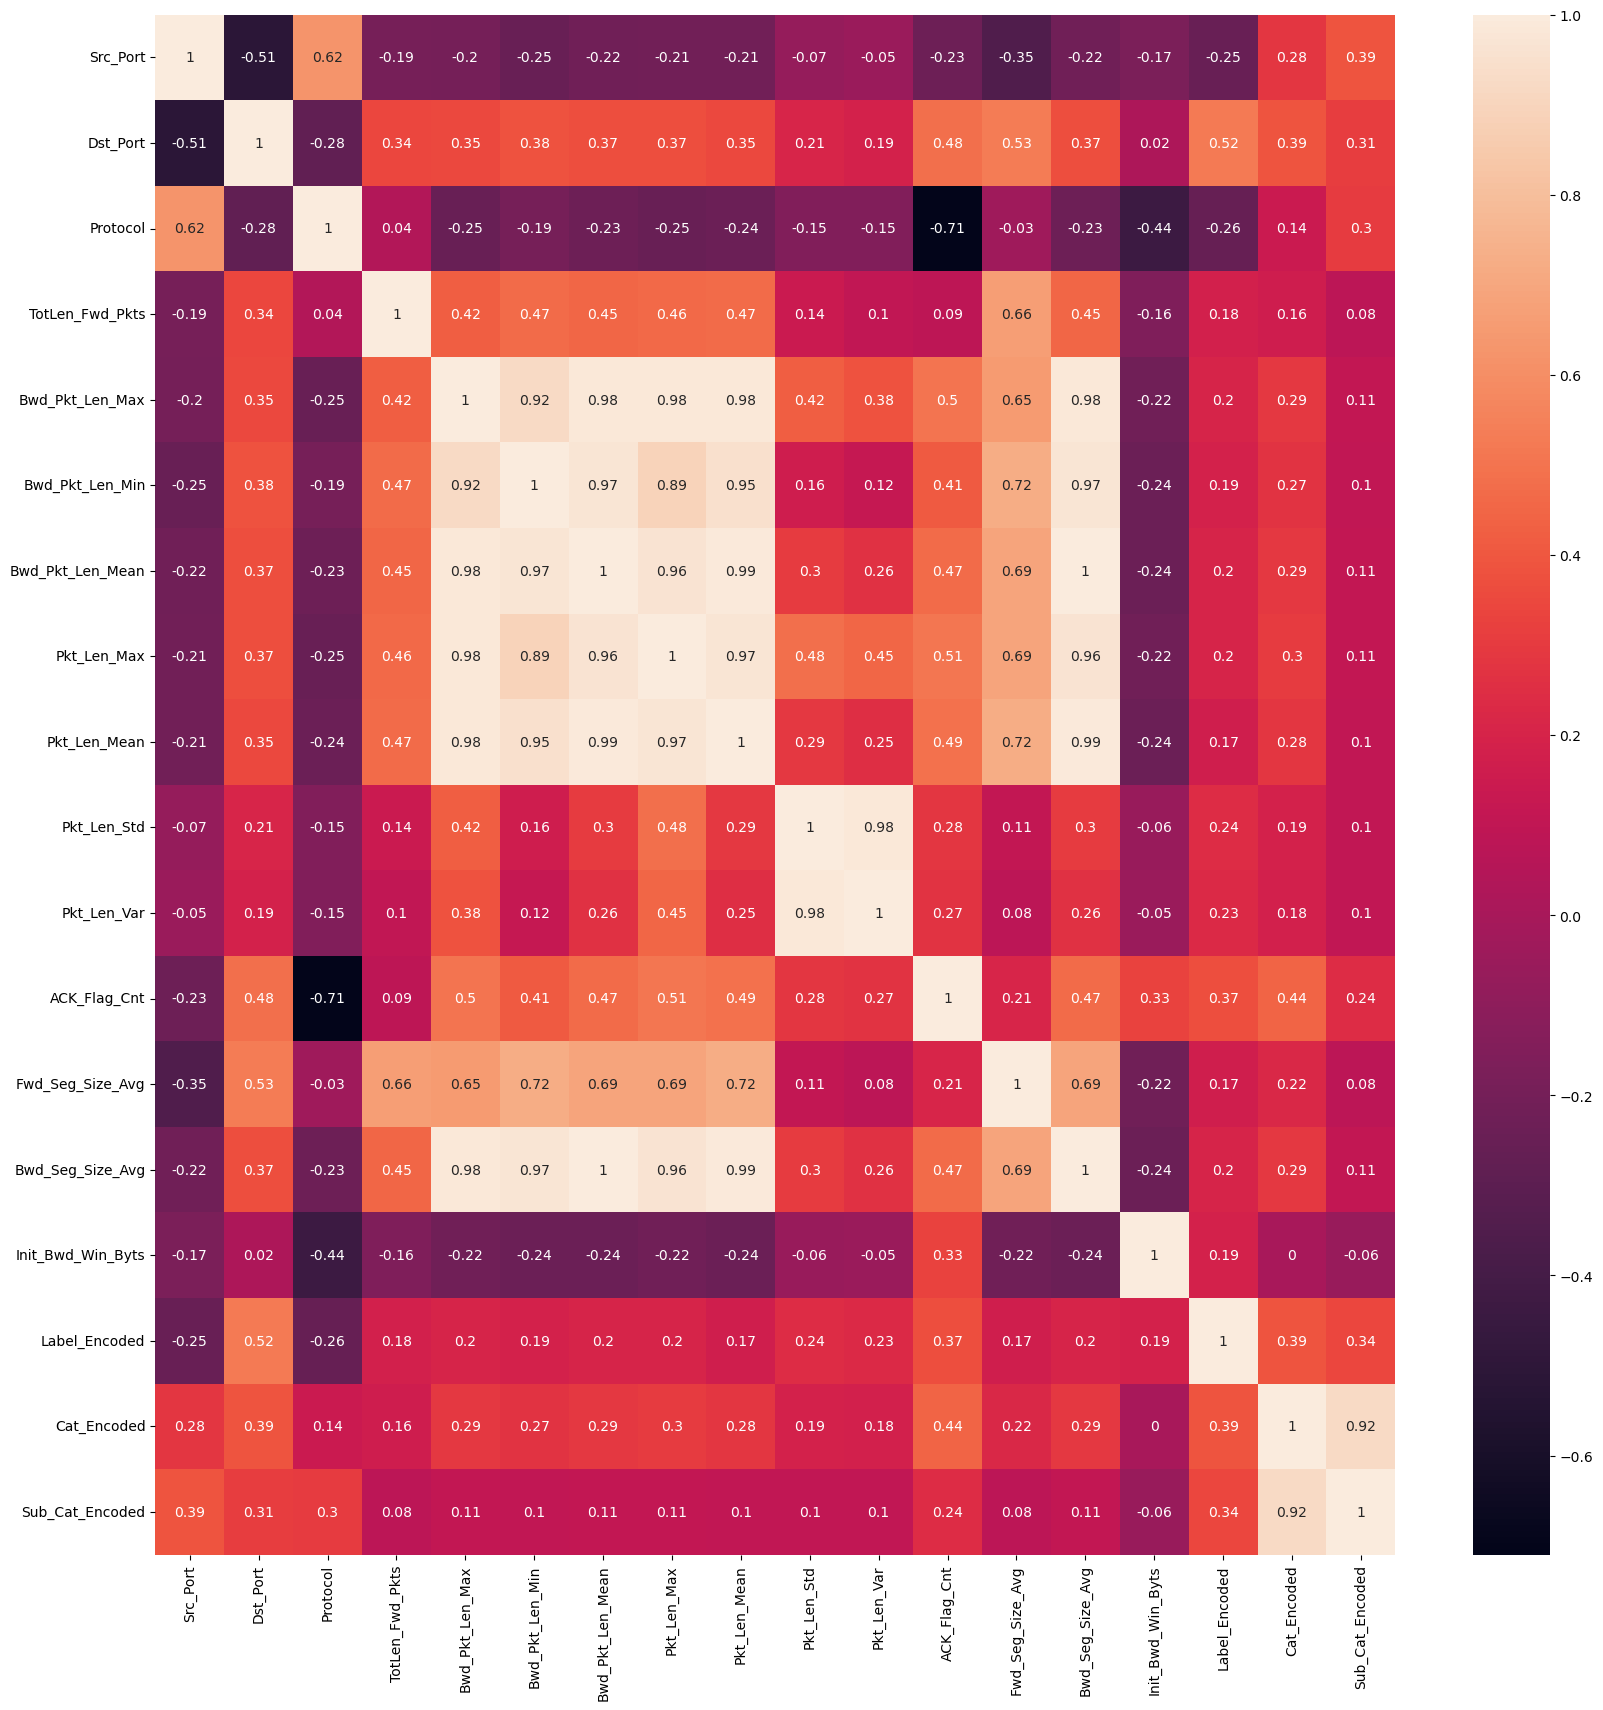

In [27]:
selected_corr=data_selected.drop(['Label', 'Cat', 'Sub_Cat'],axis=1).corr()
plt.figure(figsize=(20,20))
sns.heatmap(round(selected_corr,2),annot=True)
plt.show()

In [28]:
# # droping the un necessary columns
# columns_to_drop = [
#     'Flow_ID',        # Unique identifier (not useful for modeling)
#     'Src_IP',         # Source IP address (not useful for modeling)
#     'Src_Port',       # Source port (not useful for modeling)
#     'Dst_IP',         # Destination IP address (not useful for modeling)
#     'Dst_Port',       # Destination port (not useful for modeling)
#     'Timestamp',      # Timestamp (not useful unless doing time-series analysis)
#     'Flow_Duration',  # Redundant with other timing features
#     'Flow_Byts/s',    # Derived feature (can introduce multicollinearity)
#     'Flow_Pkts/s',    # Derived feature (can introduce multicollinearity)
#     'Fwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',  # Redundant with other packet length features
#     'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Std',  # Redundant with other packet length features
#     'Fwd_IAT_Tot', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',   # Redundant with other inter-arrival time features
#     'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min',   # Redundant with other inter-arrival time features
#     'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags', 'Bwd_URG_Flags',           # Redundant with other flag features
#     'Fwd_Header_Len', 'Bwd_Header_Len',                                          # Redundant with other header features
#     'Fwd_Pkts/s', 'Bwd_Pkts/s',                                                  # Derived feature (can introduce multicollinearity)
#     'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean', 'Pkt_Len_Std', 'Pkt_Len_Var',  # Redundant with other packet length features
#     'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',  # Redundant with other flag features
#     'CWE_Flag_Count', 'ECE_Flag_Cnt',                                            # Redundant with other flag features
#     'Down/Up_Ratio',                                                             # Derived feature (can introduce multicollinearity)
#     'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg',                      # Redundant with other packet size features
#     'Fwd_Byts/b_Avg', 'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg',                      # Derived feature (can introduce multicollinearity)
#     'Bwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg',                      # Derived feature (can introduce multicollinearity)
#     'Subflow_Fwd_Pkts', 'Subflow_Fwd_Byts', 'Subflow_Bwd_Pkts', 'Subflow_Bwd_Byts',  # Redundant with other subflow features
#     'Init_Fwd_Win_Byts', 'Init_Bwd_Win_Byts',                                    # Redundant with other window size features
#     'Fwd_Act_Data_Pkts', 'Fwd_Seg_Size_Min',                                     # Redundant with other packet size features
#     'Active_Mean', 'Active_Std', 'Active_Max', 'Active_Min',                     # Redundant with other active time features
#     'Idle_Mean', 'Idle_Std', 'Idle_Max', 'Idle_Min',                             # Redundant with other idle time features
# ]

# # Drop the unnecessary columns
# data = data.drop(columns=columns_to_drop, errors='ignore')

In [29]:
# checking the columns of the dataset after dropping the unnecessary columns
data.columns

Index(['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts',
       'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Bwd_Pkt_Len_Max',
       'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Std', 'Flow_Byts/s',
       'Flow_Pkts/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max',
       'Flow_IAT_Min', 'Fwd_IAT_Tot', 'Fwd_IAT_Mean', 'Fwd_IAT_Std',
       'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Tot', 'Bwd_IAT_Mean',
       'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Bwd_PSH_Flags',
       'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s',
       'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean', 'Pkt_Len_Std',
       'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt',
       'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt', 'Down/Up_Ratio',
       'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg',
       'Init_Bwd_Win_Byts', 'Fwd_Act_Data_Pkts', 'Label', 'Cat', 'Sub_Cat',
       'Label_Encoded', 'Cat_Encoded', 'Sub_Cat_Encoded'],
      dt

In [30]:
# checking the shape of the dataset after dropping the unnecessary columns
data.shape

(402842, 56)

In [31]:
# checking the information of the dataset after dropping the unnecessary columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 402842 entries, 0 to 625781
Data columns (total 56 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Src_Port           402842 non-null  int64  
 1   Dst_Port           402842 non-null  int64  
 2   Protocol           402842 non-null  int64  
 3   Flow_Duration      402842 non-null  int64  
 4   Tot_Fwd_Pkts       402842 non-null  int64  
 5   Tot_Bwd_Pkts       402842 non-null  int64  
 6   TotLen_Fwd_Pkts    402842 non-null  int64  
 7   TotLen_Bwd_Pkts    402842 non-null  int64  
 8   Bwd_Pkt_Len_Max    402842 non-null  int64  
 9   Bwd_Pkt_Len_Min    402842 non-null  int64  
 10  Bwd_Pkt_Len_Mean   402842 non-null  float64
 11  Bwd_Pkt_Len_Std    402842 non-null  float64
 12  Flow_Byts/s        402842 non-null  float64
 13  Flow_Pkts/s        402842 non-null  float64
 14  Flow_IAT_Mean      402842 non-null  float64
 15  Flow_IAT_Std       402842 non-null  float64
 16  Flow_IA

In [32]:
# checking the missing values in the dataset after dropping the unnecessary columns
data.isnull().sum()

Src_Port             0
Dst_Port             0
Protocol             0
Flow_Duration        0
Tot_Fwd_Pkts         0
Tot_Bwd_Pkts         0
TotLen_Fwd_Pkts      0
TotLen_Bwd_Pkts      0
Bwd_Pkt_Len_Max      0
Bwd_Pkt_Len_Min      0
Bwd_Pkt_Len_Mean     0
Bwd_Pkt_Len_Std      0
Flow_Byts/s          0
Flow_Pkts/s          0
Flow_IAT_Mean        0
Flow_IAT_Std         0
Flow_IAT_Max         0
Flow_IAT_Min         0
Fwd_IAT_Tot          0
Fwd_IAT_Mean         0
Fwd_IAT_Std          0
Fwd_IAT_Max          0
Fwd_IAT_Min          0
Bwd_IAT_Tot          0
Bwd_IAT_Mean         0
Bwd_IAT_Std          0
Bwd_IAT_Max          0
Bwd_IAT_Min          0
Bwd_PSH_Flags        0
Fwd_Header_Len       0
Bwd_Header_Len       0
Fwd_Pkts/s           0
Bwd_Pkts/s           0
Pkt_Len_Min          0
Pkt_Len_Max          0
Pkt_Len_Mean         0
Pkt_Len_Std          0
Pkt_Len_Var          0
FIN_Flag_Cnt         0
SYN_Flag_Cnt         0
RST_Flag_Cnt         0
PSH_Flag_Cnt         0
ACK_Flag_Cnt         0
URG_Flag_Cn

In [33]:
# checking the duplicate values in the dataset after dropping the unnecessary columns
data.duplicated().sum()

110107

In [34]:
# checking the unique values in the dataset after dropping the unnecessary columns
data.nunique()

Src_Port             11205
Dst_Port              1034
Protocol                 3
Flow_Duration        12669
Tot_Fwd_Pkts           116
Tot_Bwd_Pkts            42
TotLen_Fwd_Pkts       2479
TotLen_Bwd_Pkts       2612
Bwd_Pkt_Len_Max       1114
Bwd_Pkt_Len_Min       1191
Bwd_Pkt_Len_Mean      2583
Bwd_Pkt_Len_Std       2219
Flow_Byts/s          31310
Flow_Pkts/s          19577
Flow_IAT_Mean        19052
Flow_IAT_Std         28879
Flow_IAT_Max         12398
Flow_IAT_Min         11041
Fwd_IAT_Tot           1922
Fwd_IAT_Mean          6221
Fwd_IAT_Std          16998
Fwd_IAT_Max           1793
Fwd_IAT_Min           1196
Bwd_IAT_Tot          12341
Bwd_IAT_Mean         13466
Bwd_IAT_Std           4560
Bwd_IAT_Max          12223
Bwd_IAT_Min          11529
Bwd_PSH_Flags            2
Fwd_Header_Len         162
Bwd_Header_Len          86
Fwd_Pkts/s            9360
Bwd_Pkts/s           14066
Pkt_Len_Min           1240
Pkt_Len_Max           1122
Pkt_Len_Mean          5176
Pkt_Len_Std           4672
P

In [35]:
# applying some graphical analysis 

plt.figure()
# Distribution of the target variable
sns.countplot(x='Cat',hue='Label', data=data)
plt.xticks(rotation=45)
plt.title('Distribution of Labels')
plt.show()

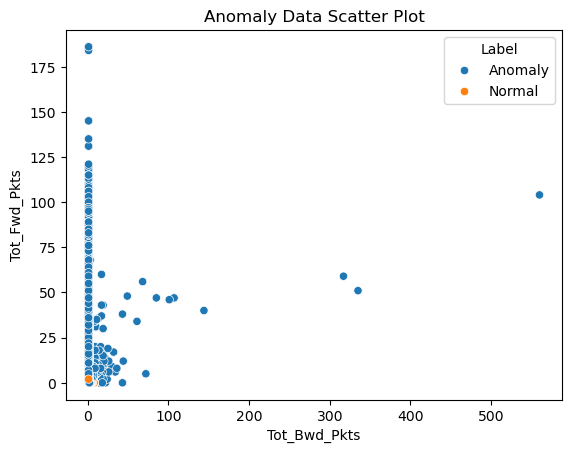

In [36]:
# ploting the anomaly data 

sns.scatterplot(data=data, y='Tot_Fwd_Pkts', x='Tot_Bwd_Pkts', hue='Label')
plt.title('Anomaly Data Scatter Plot')
plt.show()

In [37]:
# plt.figure(figsize=(50,50), dpi=100, facecolor='w', edgecolor='k', frameon=True, clear=False, linewidth=1.0, tight_layout=True)

# sns.pairplot(data=data.sample(n=1000), hue='Label', palette='coolwarm', corner=True, diag_kind='kde')
# plt.title('Pair Plot of Sample Anomaly Data')
# plt.xticks(rotation=45)
# plt.show()

In [38]:
data.columns

Index(['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts',
       'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Bwd_Pkt_Len_Max',
       'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean', 'Bwd_Pkt_Len_Std', 'Flow_Byts/s',
       'Flow_Pkts/s', 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max',
       'Flow_IAT_Min', 'Fwd_IAT_Tot', 'Fwd_IAT_Mean', 'Fwd_IAT_Std',
       'Fwd_IAT_Max', 'Fwd_IAT_Min', 'Bwd_IAT_Tot', 'Bwd_IAT_Mean',
       'Bwd_IAT_Std', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Bwd_PSH_Flags',
       'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s', 'Bwd_Pkts/s',
       'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean', 'Pkt_Len_Std',
       'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt', 'RST_Flag_Cnt',
       'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt', 'Down/Up_Ratio',
       'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg',
       'Init_Bwd_Win_Byts', 'Fwd_Act_Data_Pkts', 'Label', 'Cat', 'Sub_Cat',
       'Label_Encoded', 'Cat_Encoded', 'Sub_Cat_Encoded'],
      dt

In [39]:
selection = feature_selection.SelectKBest(score_func=feature_selection.f_classif, k=10)
X = data.drop(columns=['Label', 'Cat', 'Sub_Cat','Label_Encoded', 'Cat_Encoded',
       'Sub_Cat_Encoded'])
y = data['Label_Encoded']  # Use only one column as the target variable
selection.fit(X, y)
X_selected = selection.transform(X)
selected_features = X.columns[selection.get_support()]
selected_features

Index(['Src_Port', 'Dst_Port', 'Protocol', 'Bwd_Pkt_Len_Max',
       'Bwd_Pkt_Len_Mean', 'Pkt_Len_Max', 'Pkt_Len_Std', 'Pkt_Len_Var',
       'ACK_Flag_Cnt', 'Bwd_Seg_Size_Avg'],
      dtype='object')

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [41]:
randomforestmodel = RandomForestClassifier(n_estimators=100, random_state=0)
randomforestmodel.fit(x_train,y_train)
score = randomforestmodel.score(x_test, y_test)
print(f"Model Score: {score}")


Model Score: 0.9987340043937495


In [42]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(x_train,y_train)
score = decisiontree.score(x_test,y_test)
print(f"model score: {score}")

model score: 0.9990939443210167


In [43]:
joblib.dump(randomforestmodel, 'Models/Label_Models/randomforest_label.pkl')
joblib.dump(decisiontree, 'Models/Label_Models/descisiontree_label.pkl')

['Models/Label_Models/descisiontree_label.pkl']

[[72771    19]
 [   83  7696]]


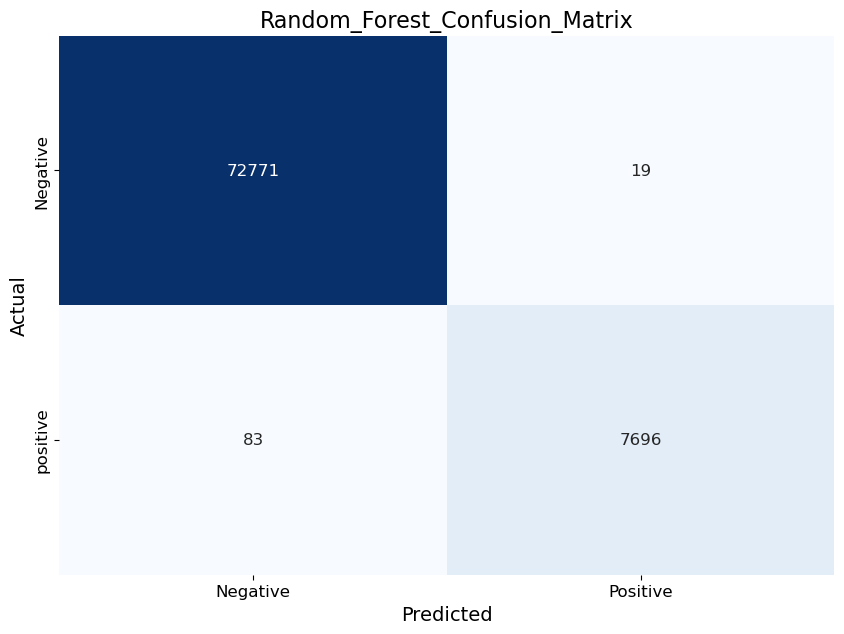

In [44]:
conf_matrix = confusion_matrix(y_test, randomforestmodel.predict(x_test))
print(conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 12})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Random_Forest_Confusion_Matrix', fontsize=16)
plt.xticks([0.5, 1.5],fontsize=12,labels=['Negative', 'Positive'])
plt.yticks([0.5, 1.5],fontsize=12,labels=['Negative', 'positive'])
plt.yticks(fontsize=12)
plt.show()

[[72770    20]
 [   53  7726]]


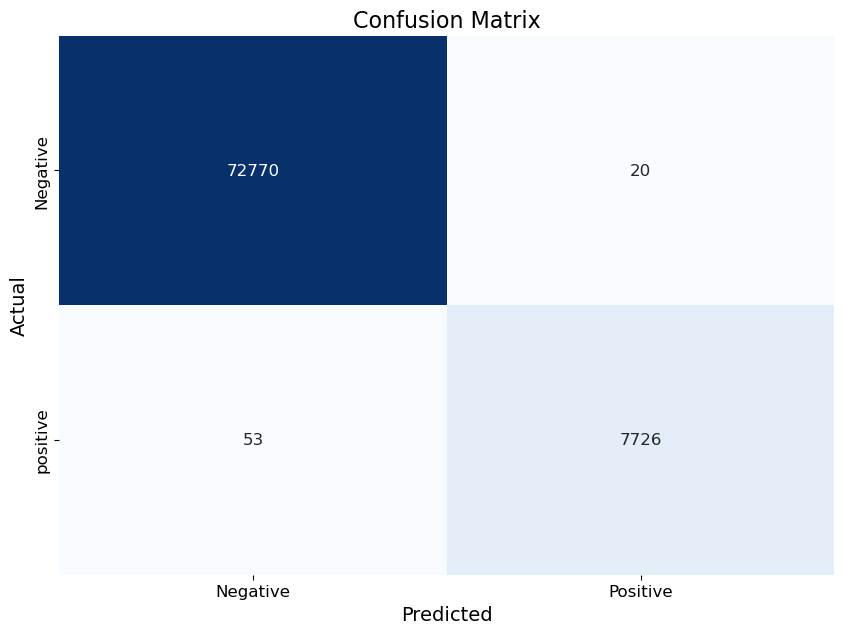

In [45]:
conf_matrix = confusion_matrix(y_test, decisiontree.predict(x_test))
print(conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 12})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks([0.5, 1.5],fontsize=12,labels=['Negative', 'Positive'])
plt.yticks([0.5, 1.5],fontsize=12,labels=['Negative', 'positive'])
plt.yticks(fontsize=12)
plt.show()

In [46]:
selection = feature_selection.SelectKBest(score_func=feature_selection.f_classif, k=10)
X = data.drop(columns=['Label', 'Cat', 'Sub_Cat','Label_Encoded', 'Cat_Encoded',
       'Sub_Cat_Encoded'])
y = data['Cat_Encoded']  # Use only one column as the target variable
selection.fit(X, y)
X_selected = selection.transform(X)
selected_features = X.columns[selection.get_support()]
selected_features

Index(['Src_Port', 'Dst_Port', 'Protocol', 'Flow_IAT_Mean', 'Flow_IAT_Min',
       'Bwd_IAT_Mean', 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'SYN_Flag_Cnt',
       'ACK_Flag_Cnt'],
      dtype='object')

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [48]:
randomforest_cat_model = RandomForestClassifier(n_estimators=100, random_state=0)
randomforest_cat_model.fit(x_train, y_train)
score = randomforest_cat_model.score(x_test, y_test)
print(f"Model Score: {score}")


Model Score: 0.9825242959450905


In [49]:
conf_matrix = confusion_matrix(y_test, randomforest_cat_model.predict(x_test))
print(conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 12})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks([0.5, 1.5],fontsize=12,labels=['Negative', 'Positive'])
plt.yticks([0.5, 1.5],fontsize=12,labels=['Negative', 'positive'])
plt.yticks(fontsize=12)
plt.show()

[[11961     1     6     5     1]
 [    2  4580   412    13    62]
 [    3   324 50949    13   125]
 [    1    27    68  7677     6]
 [    0   101   229     9  3994]]


In [50]:
decisiontree_cat_model=DecisionTreeClassifier()
decisiontree_cat_model.fit(x_train, y_train)
score = decisiontree_cat_model.score(x_test, y_test)
print(f"model score: {score}")

model score: 0.9959661904702801


[[11963     2     5     2     2]
 [    0  4990    49     6    24]
 [    4    72 51311     7    20]
 [    5    16    21  7734     3]
 [    0    53    32     2  4246]]


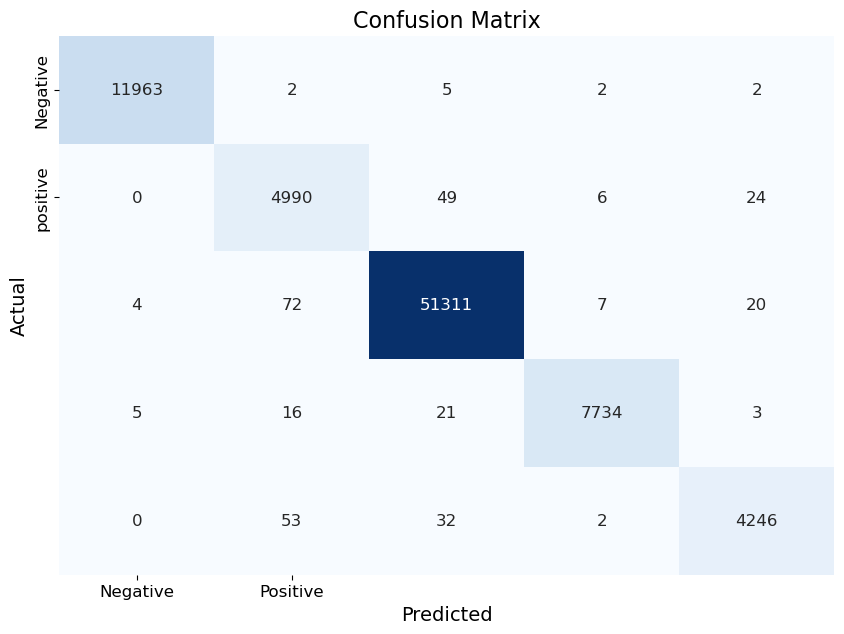

In [51]:
conf_matrix = confusion_matrix(y_test, decisiontree_cat_model.predict(x_test))
print(conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 12})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.xticks([0.5, 1.5],fontsize=12,labels=['Negative', 'Positive'])
plt.yticks([0.5, 1.5],fontsize=12,labels=['Negative', 'positive'])
plt.yticks(fontsize=12)
plt.show()

In [52]:
joblib.dump(randomforest_cat_model, 'Models/Cat_Models/randomforest_Cat.pkl')
joblib.dump(decisiontree_cat_model, 'Models/Cat_Models/descisiontree_Cat.pkl')

['Models/Cat_Models/descisiontree_Cat.pkl']

In [53]:
data['Cat_Encoded'].value_counts()

Cat_Encoded
2    257767
0     59390
3     38598
1     25347
4     21740
Name: count, dtype: int64

In [54]:
data['Cat'].value_counts()

Cat
Mirai                257767
DoS                   59390
Normal                38598
MITM ARP Spoofing     25347
Scan                  21740
Name: count, dtype: int64

In [55]:
data['Sub_Cat_Encoded'].value_counts()

Sub_Cat_Encoded
5    141697
4     63700
0     59390
6     38598
3     26535
2     25835
1     25347
8     14925
7      6815
Name: count, dtype: int64

In [56]:
data['Sub_Cat'].value_counts()

Sub_Cat
Mirai-UDP Flooding       141697
Mirai-Hostbruteforceg     63700
DoS-Synflooding           59390
Normal                    38598
Mirai-HTTP Flooding       26535
Mirai-Ackflooding         25835
MITM ARP Spoofing         25347
Scan Port OS              14925
Scan Hostport              6815
Name: count, dtype: int64

In [57]:
selection = feature_selection.SelectKBest(score_func=feature_selection.f_classif, k=10)
X = data.drop(columns=['Label', 'Cat', 'Sub_Cat','Label_Encoded', 'Cat_Encoded',
       'Sub_Cat_Encoded'])
y = data['Sub_Cat_Encoded']  # Use only one column as the target variable
selection.fit(X, y)
X_selected = selection.transform(X)
selected_features = X.columns[selection.get_support()]
selected_features

Index(['Src_Port', 'Dst_Port', 'Protocol', 'Bwd_Pkt_Len_Max', 'Flow_IAT_Mean',
       'Flow_IAT_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean', 'SYN_Flag_Cnt',
       'ACK_Flag_Cnt'],
      dtype='object')

In [58]:
randomforest_Sub_Cat_model =RandomForestClassifier(n_estimators=100, random_state=0)
randomforest_Sub_Cat_model.fit(x_train,y_train)
score=randomforest_Sub_Cat_model.score(x_test,y_test)
print(f"Model Score : {score} ")

Model Score : 0.9825242959450905 


In [59]:
randomforest_Sub_Cat_model_conf_matrix = confusion_matrix(y_test, randomforest_Sub_Cat_model.predict(x_test))
print(randomforest_Sub_Cat_model_conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 12})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('randomforest_Sub_Cat_model_conf_matrix', fontsize=16)
plt.xticks([0.5, 1.5],fontsize=12,labels=['Negative', 'Positive'])
plt.yticks([0.5, 1.5],fontsize=12,labels=['Negative', 'positive'])
plt.yticks(fontsize=12)
plt.show()

[[11961     1     6     5     1]
 [    2  4580   412    13    62]
 [    3   324 50949    13   125]
 [    1    27    68  7677     6]
 [    0   101   229     9  3994]]


In [60]:
decisiontree_Sub_Cat_model =DecisionTreeClassifier()
decisiontree_Sub_Cat_model.fit(x_train,y_train)
score=decisiontree_Sub_Cat_model.score(x_test,y_test)
print(f"Model Score : {score} ")

Model Score : 0.9960530725216895 


[[11963     2     5     2     2]
 [    0  4992    47     6    24]
 [    1    74 51314     4    21]
 [    7    16    18  7736     2]
 [    1    53    31     2  4246]]


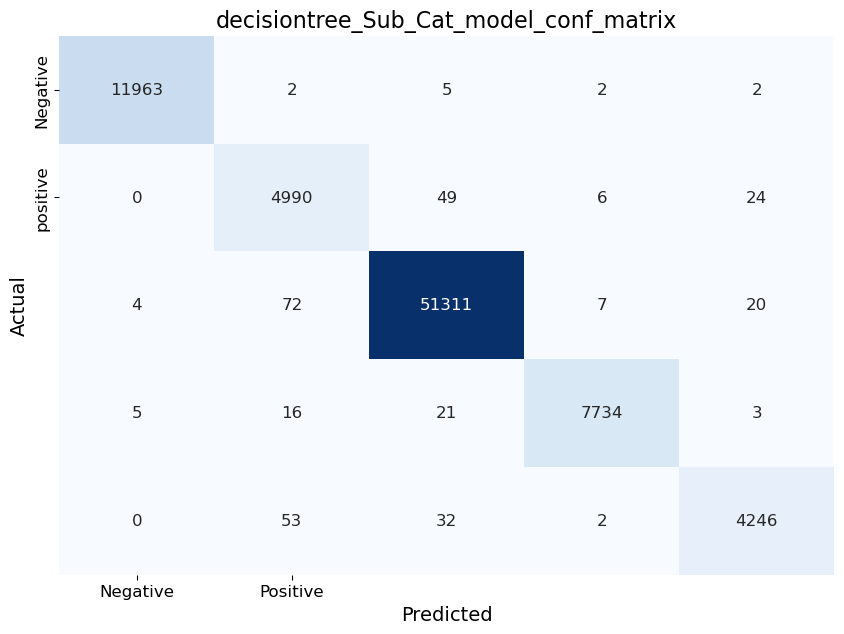

In [61]:
decisiontree_Sub_Cat_model_conf_matrix = confusion_matrix(y_test, decisiontree_Sub_Cat_model.predict(x_test))
print(decisiontree_Sub_Cat_model_conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 12})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('decisiontree_Sub_Cat_model_conf_matrix', fontsize=16)
plt.xticks([0.5, 1.5],fontsize=12,labels=['Negative', 'Positive'])
plt.yticks([0.5, 1.5],fontsize=12,labels=['Negative', 'positive'])
plt.yticks(fontsize=12)
plt.show()

In [62]:
joblib.dump(randomforest_Sub_Cat_model, 'Models/Sub_Cat_Models/randomforest_Sub_Cat.pkl')

joblib.dump(decisiontree_Sub_Cat_model, 'Models/Sub_Cat_Models/descisiontree_Sub_Cat.pkl')

['Models/Sub_Cat_Models/descisiontree_Sub_Cat.pkl']

In [63]:
data['Sub_Cat'].value_counts().sort_index()


Sub_Cat
DoS-Synflooding           59390
MITM ARP Spoofing         25347
Mirai-Ackflooding         25835
Mirai-HTTP Flooding       26535
Mirai-Hostbruteforceg     63700
Mirai-UDP Flooding       141697
Normal                    38598
Scan Hostport              6815
Scan Port OS              14925
Name: count, dtype: int64

In [64]:
data['Sub_Cat_Encoded'].value_counts().sort_index()

Sub_Cat_Encoded
0     59390
1     25347
2     25835
3     26535
4     63700
5    141697
6     38598
7      6815
8     14925
Name: count, dtype: int64